## 02_04: Comprehensions and generators

In [1]:
import json

In [2]:
import numpy as np
import matplotlib.pyplot as pp

In [3]:
import geopy
import cartopy

In [4]:
cities, years = [], []

for game in open('games.txt', 'r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')

    cities.append(city)
    years.append(year)

In [5]:
coordinates_by_city = json.load(open('coords.json', 'r'))

In [6]:
coordinates_by_city

{'Athens': [23.7283052, 37.9839412],
 'Paris': [2.3514616, 48.8566969],
 'St Louis': [-90.1994097, 38.6268039],
 'London': [-0.1276474, 51.5073219],
 'Stockholm': [18.0710935, 59.3251172],
 'Antwerp': [4.3997081, 51.2211097],
 'Amsterdam': [4.897975505617977, 52.37454030000001],
 'Los Angeles': [-118.2427666, 34.0536909],
 'Berlin': [13.3888599, 52.5170365],
 'Helsinki': [24.9425769, 60.1674098],
 'Melbourne / Stockholm': [144.9631608, -37.8142176],
 'Rome': [12.4829321, 41.8933203],
 'Tokyo': [139.7594549, 35.6828387],
 'Mexico': [-99.1331785, 19.4326296],
 'Munich': [11.5753822, 48.1371079],
 'Montreal': [-73.6103642, 45.4972159],
 'Moscow': [37.6174943, 55.7504461],
 'Seoul': [126.9782914, 37.5666791],
 'Barcelona': [2.1774322, 41.3828939],
 'Atlanta': [-84.3901849, 33.7490987],
 'Sydney': [151.2164539, -33.8548157],
 'Beijing': [116.3912757, 39.906217],
 'Rio': [-43.2093727, -22.9110137]}

In [7]:
results = []

for city, year in zip(cities, years):
    # int() needed because otherwise year is a string
    if int(year) > 1945:
        results.append(city + ': ' + year)

In [8]:
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [9]:
# list comprehension:
# [f(element) for element in iterator if condition(element)]

results = [(city + ': ' + year)
           for city, year in zip(cities, years)
           if int(year) > 1945]

In [10]:
results = [(city + ': ' + year) for city, year in zip(cities, years) if int(year) > 1945]

In [12]:
results[:10]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964',
 'Mexico: 1968',
 'Munich: 1972',
 'Montreal: 1976',
 'Moscow: 1980',
 'Los Angeles: 1984']

In [13]:
cities_by_year = {year: city for city, year in zip(cities,years)}

In [14]:
cities_by_year

{'1896': 'Athens',
 '1900': 'Paris',
 '1904': 'St Louis',
 '1908': 'London',
 '1912': 'Stockholm',
 '1920': 'Antwerp',
 '1924': 'Paris',
 '1928': 'Amsterdam',
 '1932': 'Los Angeles',
 '1936': 'Berlin',
 '1948': 'London',
 '1952': 'Helsinki',
 '1956': 'Melbourne / Stockholm',
 '1960': 'Rome',
 '1964': 'Tokyo',
 '1968': 'Mexico',
 '1972': 'Munich',
 '1976': 'Montreal',
 '1980': 'Moscow',
 '1984': 'Los Angeles',
 '1988': 'Seoul',
 '1992': 'Barcelona',
 '1996': 'Atlanta',
 '2000': 'Sydney',
 '2004': 'Athens',
 '2008': 'Beijing',
 '2012': 'London',
 '2016': 'Rio'}

In [15]:
cities_after_1930 = {city for year, city in cities_by_year.items() if int(year) > 1930}

In [16]:
cities_after_1930

{'Athens',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'Berlin',
 'Helsinki',
 'London',
 'Los Angeles',
 'Melbourne / Stockholm',
 'Mexico',
 'Montreal',
 'Moscow',
 'Munich',
 'Rio',
 'Rome',
 'Seoul',
 'Sydney',
 'Tokyo'}

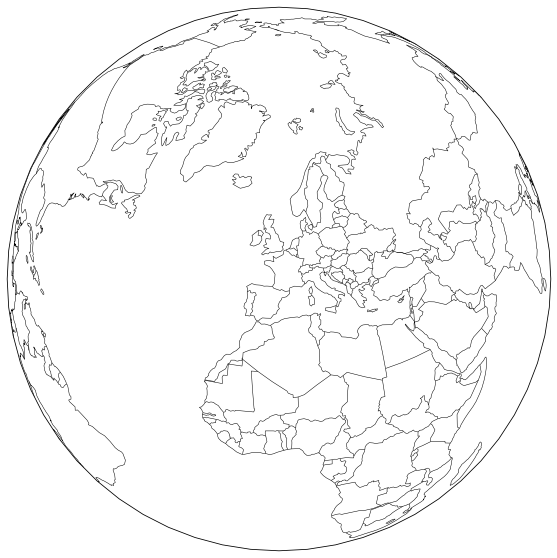

In [17]:
# start a large figure
pp.figure(figsize=(10,10))

# make the projection
axes = pp.axes(projection=cartopy.crs.Orthographic(central_latitude=45, central_longitude=0))

# add boundaries
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

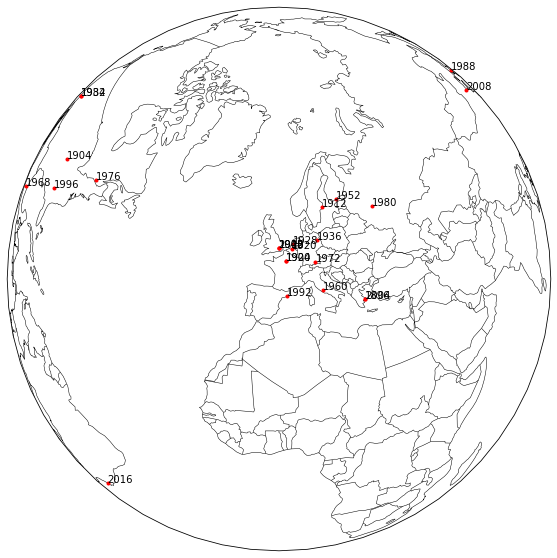

In [18]:
# start a large figure
pp.figure(figsize=(10,10))

# make the projection
axes = pp.axes(projection=cartopy.crs.Orthographic(central_latitude=45, central_longitude=0))

# add boundaries
axes.add_feature(cartopy.feature.COASTLINE, linewidth=0.5)
axes.add_feature(cartopy.feature.BORDERS, linewidth=0.5)

for year, city in cities_by_year.items():        
    lon, lat = coordinates_by_city[city]

    # skip cities on the other side of the globe
    if lon < 130:
        # plot with cartopy coordinate system
        axes.plot(lon, lat, 'r.', transform=cartopy.crs.Geodetic())
        axes.text(lon, lat, year, transform=cartopy.crs.Geodetic())
    
axes.set_global()

In [19]:
sum(i**2 for i in range(20) if i % 2 == 0)

1140

In [21]:
even = (i**2 for i in range(20) if i % 2 == 0)

In [ ]:
even = (i**2 for i in range(20) if i % 2 == 0)

In [22]:
even

<generator object <genexpr> at 0x7f7929854ac0>

In [23]:
even.__next__()

0

In [24]:
even.__next__()

4

In [25]:
even.__next__()

16

In [26]:
def fibonacci():
    print("Let's get set!")
    f1, f2 = 0, 1
    
    while True:
        yield f2
        
        f1, f2 = f2, f1 + f2

In [27]:
f = fibonacci()

In [28]:
f

<generator object fibonacci at 0x7f793abaa5f0>

In [29]:
f.__next__()

Let's get set!


1

In [30]:
f.__next__()

1

In [31]:
f.__next__()

2

In [32]:
f.__next__()

3

In [33]:
for x in fibonacci():
    if x > 1000:
        break
    
    print(x)

Let's get set!
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987


In [34]:
def fibonacci(fmax):
    f1, f2 = 0, 1
    
    while True:
        yield f2
        
        f1, f2 = f2, f1 + f2
        
        if f2 > fmax:
            return

In [35]:
[x for x in fibonacci(1000)]

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]